In [1]:
import datetime

# (hours, minutes)
start_time = datetime.time(7, 0)
# (year, month, day)
start_date = datetime.date(2019, 8, 14)

start_datetime = datetime.datetime.combine(start_date, start_time)

# (days, seconds, microseconds: timedeltas)

start_datetime.date().weekday()

new_datetime = datetime.datetime.strptime('2019-08-14', '%Y-%m-%d')
# Turn a datetime into a date string
new_datetime.strftime('%Y-%m-%d')

#https://github.com/khuyentran1401/Data-science/blob/master/time_series/extract_features/extract_features_from_dates.ipynb

In [6]:
import pandas as pd
#import janitor
#import datetime

from IPython.core.display import display, HTML
import pyvis
from pyvis import network
import networkx as nx

In [8]:
nx.__version__

'2.4'

In [2]:
#df_ori = pd.read_csv("Connections.csv", skiprows=2)
#df = pd.read_excel("Connections.xlsx", sheet_name= "worksheet")
df = pd.read_excel("Connections.xlsx")
df.head()

,First_Name,Last_Name,Email_Address,Company,Position,Connected On
0,Akshay,Takawale,NaN,VisionNLP,Data Science Intern,2021-11-16
1,Nishaa,Selvaraj,NaN,NaN,NaN,2021-11-16
2,Chandrakanth,LNS,NaN,Brane Enterprises pvt ltd,Data Scientist,2021-11-16
3,Prathamesh,Agarwal,NaN,Anchanto,Data Scientist,2021-11-15
4,Gatima,Nupur,NaN,Accenture,Senior Analyst,2021-11-14


In [13]:
#df = (
#    df_ori
#    .clean_names() # remove spacing and capitalization
#    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
#    .dropna(subset=['company', 'position']) # drop missing values in company and position
#    .to_datetime('connected_on', format='%d %b %Y')
#  )


In [3]:
df = (df
    .drop(columns = ['First_Name', 'Last_Name', 'Email_Address']) # drop for privacy
    .dropna(subset = ['Position']) # drop missing values in company and position
  )

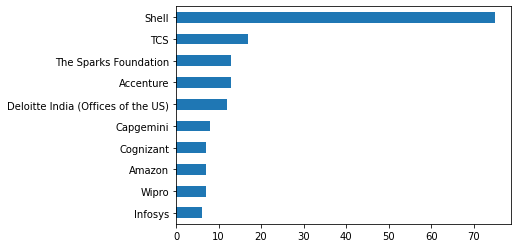

In [3]:
df['Company'].value_counts().head(10).plot(kind = "barh").invert_yaxis()

In [34]:
#df['connected_on'].hist(xrot=35, bins=15);
#df.drop()

#pattern = "freelance|self-employed"
#df = df[~df['company'].str.contains(pattern, case=False)]

In [4]:
df_company = df['Company'].value_counts().reset_index()
df_company.columns = ['Company', 'count']
df_company = df_company.sort_values(by = "count", ascending = False)
#df_company.head(10)

In [4]:
df_post = df['Position'].value_counts().reset_index()
df_post.columns = ['Position', 'count']
df_post = df_post.sort_values(by = "count", ascending = False)

In [6]:
##Generic graph

nt = network.Network(notebook = True)

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title = "info1")
g.add_node(2, label = "Company 2", size=40, title = "info2")
g.add_node(3, label = "Company 3", size=60, title = "info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')
#display(HTML('nodes.html'))

In [ ]:
#print(f"number of nodes: {g.number_of_nodes()}")
#print(f"number of edges: {g.number_of_edges()}")

In [16]:
for _, row in df_company.head(5).iterrows():
  print(row['Company'] + "-" + str(row['count']))

Shell-74
Tata Consultancy Services-17
The Sparks Foundation-13
Accenture-13
Deloitte India (Offices of the US)-12


In [5]:
df_post_reduced = df_post.loc[df_post['count'] >= 1]
print(df_post_reduced.shape)

(13, 2)


In [1]:
#print(df_position.shape)
#df_position_reduced = df_position.loc[df_position['count'] >= 5]
#print(df_position_reduced.shape)

In [6]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central


#use iterrows tp iterate through the data frame
for _, row in df_post_reduced.iterrows():


  # store company name and count
  post = row['Position']
  count = row['count']

  title = f"<b>{post}</b> - {count}"
  #title = f"{count}"
  #positions = set([x for x in df[Position == df['Company']]['Position']])
  #positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  #company_list = f"<ul>{company}</ul>"
  #hover_info = title + company_list
  hover_info = title

  #g.add_node(company, size = count*2, title = hover_info, color = '#3449eb')
  g.add_node(post, size = count*2, title = hover_info, color = 'red')
  g.add_edge('root', post, color = 'grey')

#generate the graph
nt = network.Network(height = '700px', width = '900px', bgcolor = "white", font_color = 'black', notebook = True)
nt.from_nx(g)
nt.hrepulsion()

# more customization https://tinyurl.com/yf5lvvdm
nt.show('company_graph.html')
#display(HTML('company_graph.html'))